In [19]:
from osgeo import gdal, ogr, osr
import numpy as np 
import os 
from matplotlib import pyplot as plt

In [58]:
#Image-2019
path_B4_2019="../data/LandCover/Image20190203clip/LC08_L1TP_029047_20190203_20190206_01_T1_B4_clip.tif"

#Image-2014
path_B4_2014="../data/LandCover/Image20140205clip/LC08_L1TP_029047_20140205_20170307_01_T1_B4_clip.tif"
#Output Files

#Output NDVI Rasters 
path_Change_19_14 = '../data/Output/LCC/Change_19_14.tif'

#NDVI Contours
contours_Change_19_14 = '../data/Output/LCC/Change_19_14.shp'

In [43]:
#Open raster bands
B4_2019 = gdal.Open(path_B4_2019)
B4_2014 = gdal.Open(path_B4_2014)


#Read bands as matrix arrays
B42019_Data = B4_2019.GetRasterBand(1).ReadAsArray().astype(np.float32)
B42014_Data = B4_2014.GetRasterBand(1).ReadAsArray().astype(np.float32)

In [46]:
# print projection to ensure they are overlapping appropriately
print(B4_2014.GetProjection()[:80])
print(B4_2019.GetProjection()[:80])
if B4_2014.GetProjection()[:80]==B4_2019.GetProjection()[:80]: print('SRC OK')

# shape 
print(B42014_Data.shape)
print(B42019_Data.shape)
if B42014_Data.shape==B42019_Data.shape: print('Array Size OK')

# geotransform
print(B4_2014.GetGeoTransform())
print(B4_2019.GetGeoTransform())
if B4_2014.GetGeoTransform()==B4_2019.GetGeoTransform(): print('Geotransformation OK')


PROJCS["WGS 84 / UTM zone 13N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84
PROJCS["WGS 84 / UTM zone 13N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84
SRC OK
(610, 597)
(610, 597)
Array Size OK
(652500.0, 29.98324958123953, 0.0, 2166000.0, 0.0, -30.0)
(652500.0, 29.98324958123953, 0.0, 2166000.0, 0.0, -30.0)
Geotransformation OK


In [47]:
geotransform = B4_2014.GetGeoTransform()

originX,pixelWidth,empty,finalY,empty2,pixelHeight=geotransform
cols =  B4_2014.RasterXSize
rows =  B4_2014.RasterYSize


In [48]:
projection = B4_2014.GetProjection()

finalX = originX + pixelWidth * cols
originY = finalY + pixelHeight * rows

In [55]:
def saveRaster(dataset,datasetPath,cols,rows,projection):
    rasterSet = gdal.GetDriverByName('GTiff').Create(datasetPath, cols, rows,1,gdal.GDT_Float32)
    rasterSet.SetProjection(projection)
    rasterSet.SetGeoTransform(geotransform)
    rasterSet.GetRasterBand(1).WriteArray(dataset)
    rasterSet.GetRasterBand(1).SetNoDataValue(-999)
    rasterSet = None

In [56]:
Change = B42019_Data-B42014_Data
Change = np.where((B42014_Data>-999) & (B42019_Data>-999),Change,-999)
Change

array([[   0.,  -40., -174., ...,  110.,  -60.,   -6.],
       [   0., -108., -146., ...,  208.,  -32.,   -5.],
       [   0., -224., -409., ...,  893.,  734.,  -18.],
       ...,
       [   0., -521., -182., ...,  -31.,  -93., -789.],
       [   0.,  -38., -103., ..., -153., -389., -761.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]], dtype=float32)

In [53]:
saveRaster(Change,path_Change_19_14,cols,rows,projection)

In [60]:
extentArray = [originX,finalX,originY,finalY]
def plotNDVI(ndviImage,extentArray,vmin,cmap):
    ndvi = gdal.Open(ndviImage)
    ds2019 = ndvi.ReadAsArray()
    plt.figure(figsize=(20,15))
    im = plt.imshow(ds2019, vmin=vmin, cmap=cmap, extent=extentArray)#
    plt.colorbar(im, fraction=0.015)
    plt.xlabel('East')
    plt.ylabel('North')
    plt.show()


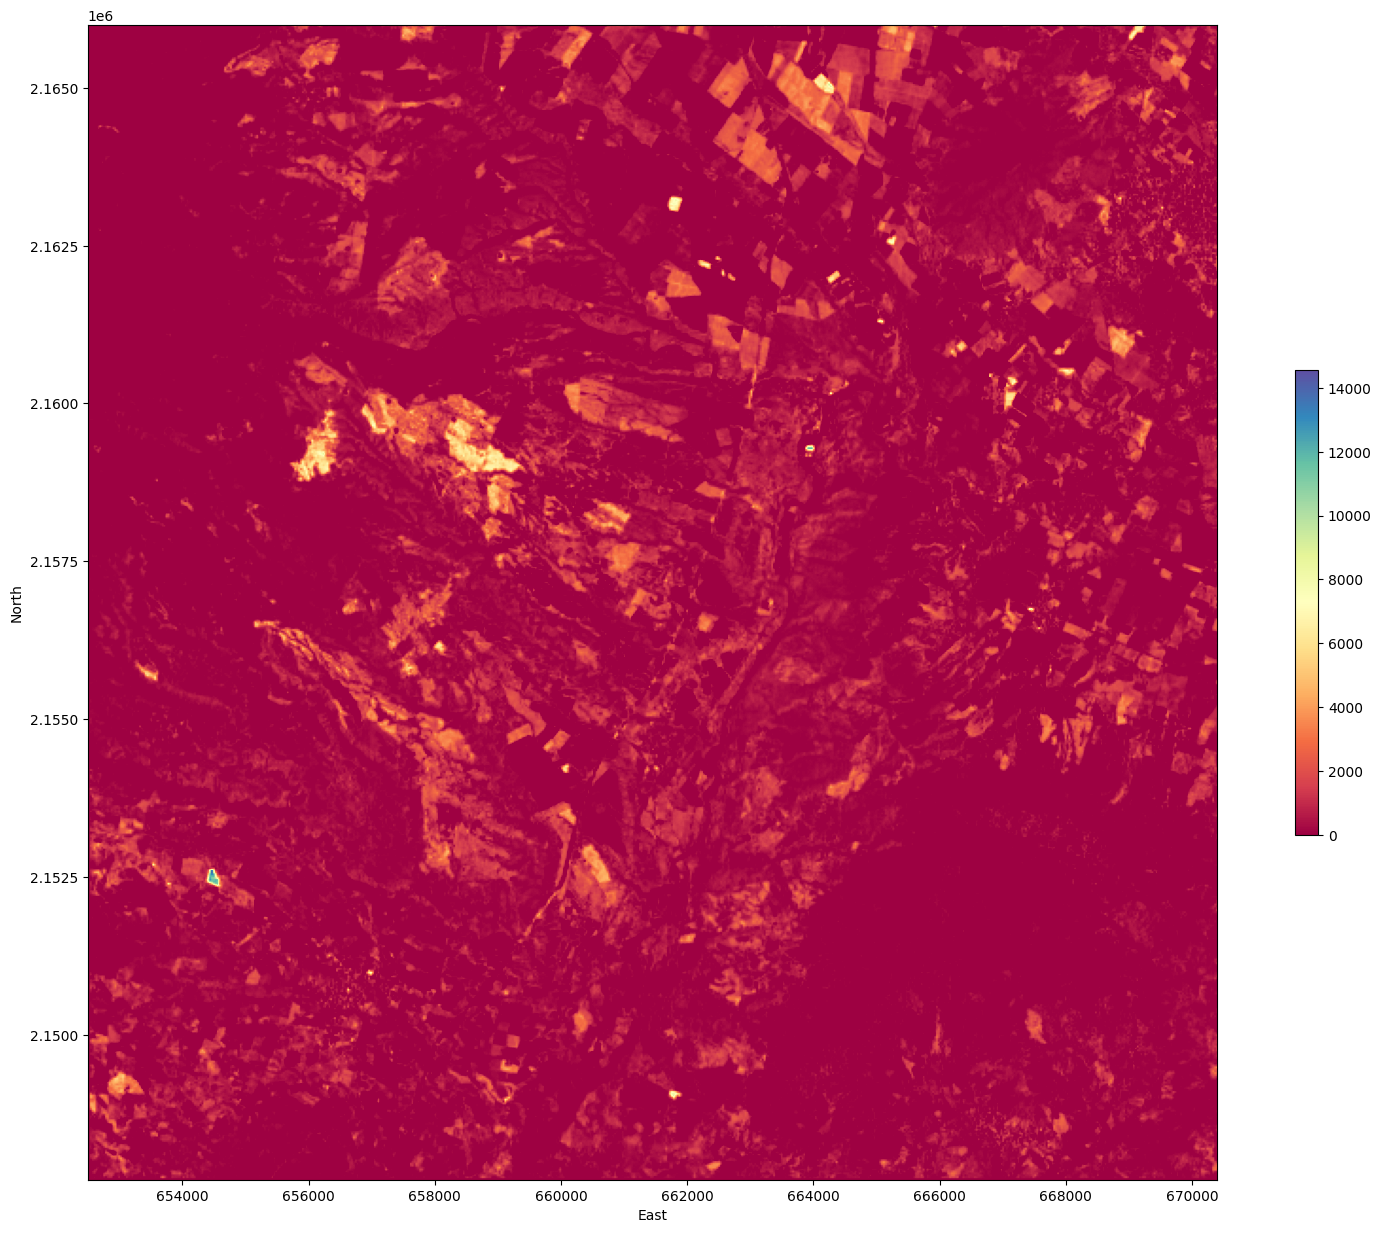

In [61]:
plotNDVI(path_Change_19_14,extentArray,-0.5,'Spectral')